In [1]:
# %pip install datasets
# %pip install Pillow
# %pip install numpy
# %pip install matplotlib
# %pip install import_ipynb
# %pip install tensorflow
# %pip install tensorflow.keras
# %pip install easyocr
# %pip install pandas

# # library from etl
# %pip install datasets
# %pip install numpy
# %pip install Pillow
# %pip install opencv-python
# %pip install json

In [4]:
import easyocr
import matplotlib.pyplot as plt
from datasets import load_dataset
import numpy as np
from PIL import Image
import cv2
import tensorflow as tf
# from tensorflow.keras import layers
import json
import pandas as pd

In [5]:
from kaggle_secrets import UserSecretsClient
import os

# Ambil GitHub token dari Kaggle Secrets
user_secrets = UserSecretsClient()
myGithub = user_secrets.get_secret("githubKey")

# Clone repo GitHub
!git clone https://{myGithub}@github.com/fitristachan/invoice-image-processing.git invoice_image_processing
!git -C invoice_image_processing pull

Cloning into 'invoice_image_processing'...
remote: Enumerating objects: 1628, done.
remote: Counting objects: 100% (143/143), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 1628 (delta 94), reused 66 (delta 40), pack-reused 1485 (from 2)
Receiving objects: 100% (1628/1628), 308.61 MiB | 39.29 MiB/s, done.
Resolving deltas: 100% (271/271), done.
Updating files: 100% (1296/1296), done.
Already up to date.


In [4]:
# from google.colab import userdata

# # Retrieve the GitHub token from userdata
# myGithub = userdata.get('githubKey')

# !git clone https://{myGithub}@github.com/fitristachan/invoice-image-processing.git /content/invoice_image_processing
# !git -C invoice_image_processing pull



In [5]:
# import sys
# import os

# sys.path.append('/content/invoice-image-processing')
# print(os.listdir('/content/invoice-image-processing'))

# !jupyter nbconvert --to script '/content/invoice-image-processing/data_etl_invoice.ipynb' --output data_etl

Image Classification

In [6]:
from invoice_image_processing.data_etl import DatasetReceipt

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [7]:
# Inisialisasi dataset
dataset_local = DatasetReceipt(dataset_name="naver-clova-ix/cord-v2", split="train")
dataset_inter = DatasetReceipt(dataset_name="katanaml-org/invoices-donut-data-v1", split="train")

README.md:   0%|          | 0.00/27.0 [00:00<?, ?B/s]

dataset_infos.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

(…)-00000-of-00004-b4aaeceff1d90ecb.parquet:   0%|          | 0.00/490M [00:00<?, ?B/s]

(…)-00001-of-00004-7dbbe248962764c5.parquet:   0%|          | 0.00/441M [00:00<?, ?B/s]

(…)-00002-of-00004-688fe1305a55e5cc.parquet:   0%|          | 0.00/444M [00:00<?, ?B/s]

(…)-00003-of-00004-2d0cd200555ed7fd.parquet:   0%|          | 0.00/456M [00:00<?, ?B/s]

(…)-00000-of-00001-cc3c5779fe22e8ca.parquet:   0%|          | 0.00/242M [00:00<?, ?B/s]

(…)-00000-of-00001-9c204eb3f4e11791.parquet:   0%|          | 0.00/234M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/800 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/100 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/100 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/1.04k [00:00<?, ?B/s]

(…)-00000-of-00001-a5c51039eab2980a.parquet:   0%|          | 0.00/167M [00:00<?, ?B/s]

(…)-00000-of-00001-b8a5c4a6237baf25.parquet:   0%|          | 0.00/19.9M [00:00<?, ?B/s]

(…)-00000-of-00001-56af6bd5ff7eb34d.parquet:   0%|          | 0.00/10.4M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/425 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/50 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/26 [00:00<?, ? examples/s]

In [10]:
from keras.applications import ResNet50V2

# keras.applications.ResNet50V2(
#     include_top=True,
#     weights="imagenet",
#     input_tensor=None,
#     input_shape=None,
#     pooling=None,
#     classes=1000,
#     classifier_activation="softmax",
#     name="resnet50v2",
# )

pre_trained_model = ResNet50V2(input_shape = (600, 600, 3),
                                include_top = False,
                                pooling='max'
                                )

pre_trained_model.summary()

Model: "resnet50v2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 600, 600, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 606, 606, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 300, 300, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 302, 302, 64)   │              0 │ conv1_conv[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 150, 150, 64)   │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_bn    │ (None, 150, 150, 64)   │            256 │ pool1_pool[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_relu  │ (None, 150, 150, 64)   │              0 │ conv2_block1_preact_b… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 150, 150, 64)   │          4,096 │ conv2_block1_preact_r… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 150, 150, 64)   │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 150, 150, 64)   │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_pad        │ (None, 152, 152, 64)   │              0 │ conv2_block1_1_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 150, 150, 64)   │         36,864 │ conv2_block1_2_pad[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 150, 150, 64)   │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 150, 150, 64)   │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv  

 Total params: 23,564,800 (89.89 MB)

 Trainable params: 23,519,360 (89.72 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [11]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd

# Load Dataset
train_dataset = DatasetReceipt(dataset_name="naver-clova-ix/cord-v2", split="train")
val_dataset = DatasetReceipt(dataset_name="naver-clova-ix/cord-v2", split="validation")

def dataset_generator(dataset, batch_size=16, max_items=10, max_name_length=20, vocab_size=128):
    while True:
        batch_images = []
        batch_names = []
        batch_quantities = []
        batch_prices = []
        batch_totals = []

        for _ in range(batch_size):
            sample = dataset[np.random.randint(len(dataset))]
            
            img = sample["image"]
            if img.ndim == 4 and img.shape[0] == 1:
                img = img[0]
            batch_images.append(img)

            padded_names = np.zeros((max_items, max_name_length), dtype=np.int32)
            padded_quantities = np.zeros((max_items, max_name_length), dtype=np.int32)
            padded_prices = np.zeros((max_items, max_name_length), dtype=np.int32)
            padded_total = np.zeros(max_name_length, dtype=np.int32)

            if "item_names" in sample and len(sample["item_names"]) > 0:
                item_names = sample["item_names"]
                quantities = sample.get("quantities", ["0"] * len(item_names))
                prices = sample.get("prices", ["0"] * len(item_names))
                total_price = sample.get("total_price", "0")

                # Cast to string first
                quantities = [str(q) for q in quantities]
                prices = [str(p) for p in prices]
                total_price = str(total_price)

                n_items = min(len(item_names), max_items)

                for i in range(n_items):
                    name = str(item_names[i])[:max_name_length]
                    quantity = quantities[i][:max_name_length]
                    price = prices[i][:max_name_length]

                    name_token = [ord(c) % vocab_size for c in name]
                    qty_token = [ord(c) % vocab_size for c in quantity]
                    price_token = [ord(c) % vocab_size for c in price]

                    padded_names[i, :len(name_token)] = name_token
                    padded_quantities[i, :len(qty_token)] = qty_token
                    padded_prices[i, :len(price_token)] = price_token

                # Total price
                total_token = [ord(c) % vocab_size for c in total_price[:max_name_length]]
                padded_total[:len(total_token)] = total_token

            batch_names.append(padded_names)
            batch_quantities.append(padded_quantities)
            batch_prices.append(padded_prices)
            batch_totals.append(padded_total)

        # Convert to numpy arrays
        batch_images = np.array(batch_images, dtype=np.float32)
        
        # Only item_name is categorical (sequence of one-hot)
        batch_names = to_categorical(batch_names, num_classes=vocab_size)
        
        # The others are numeric regression targets
        batch_quantities = np.array(batch_quantities, dtype=np.float32)[:, :, 0]
        batch_prices = np.array(batch_prices, dtype=np.float32)[:, :, 0]
        batch_totals = np.array(batch_totals, dtype=np.float32)[:, 0]


        # # Optional: one-hot encode
        # batch_names = to_categorical(batch_names, num_classes=vocab_size)
        # batch_quantities = to_categorical(batch_quantities, num_classes=vocab_size)
        # batch_prices = to_categorical(batch_prices, num_classes=vocab_size)
        # batch_totals = to_categorical(batch_totals, num_classes=vocab_size)

        yield (batch_images, {
            "item_name": batch_names,
            "quantity": batch_quantities,
            "price": batch_prices,
            "total_price": batch_totals
        })

 

In [12]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Lambda, LSTM, Dense, TimeDistributed, RepeatVector
from tensorflow.keras import backend as K
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dropout, Input
import tensorflow as tf

# Training hyperparameters
INITIAL_LR = 1e-8
SECOND_LR = 0.0001
MOMENTUM = 0.9
GRADIENT_CLIP_NORM = 1.0
STD_DEV = 0.01
EPOCHS = 25
STEPS_PER_EPOCH = 1000
NMS_IOU_THRESHOLD = 0.8
NUM_CHAR_CLASSES = 122

# 1. Define Input Layer
inputs = Input(shape=(600, 600, 3))  # Match your image size

# 2. Load Pretrained ResNet50V2 (without top)
base_model = ResNet50V2(
    input_shape=(600, 600, 3),
    include_top=False,
    pooling='max'  # GlobalMaxPooling2D
)
base_model.trainable = False  # Freeze weights

# 3. Connect Base Model to Inputs
x = base_model(inputs)

# 4. Add Custom Layers with Proper Initialization
kernel_initializer = tf.keras.initializers.RandomNormal(stddev=STD_DEV)
x = Dense(512, activation='relu', kernel_initializer=kernel_initializer)(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu', 
          kernel_regularizer=regularizers.l2(0.01),
          kernel_initializer=kernel_initializer)(x)

# For price/quantity outputs, add reasonable constraints:
price_output = Dense(10, activation='relu', name='price')(x)  # Prevents negative prices
quantity_output = Dense(10, activation='relu', name='quantity')(x)     # Prevents negative quantities

# Total amount regression
total_output = Dense(1, name="total_price", kernel_initializer=kernel_initializer)(x)

# Bikin sequence vector 10x20, bukan 200 langsung
sequence_input = RepeatVector(10)(Dense(256, activation='relu')(x))  # (None, 10, 256)
sequence_output = TimeDistributed(RepeatVector(20))(sequence_input)  # (None, 10, 20, 256)

# LSTM per item + karakter
lstm_output = TimeDistributed(LSTM(128, return_sequences=True))(sequence_output)  # (None, 10, 20, 128)

# Output klasifikasi per karakter (pakai softmax)
name_output = TimeDistributed(TimeDistributed(Dense(NUM_CHAR_CLASSES, activation='softmax')), name='item_name')(lstm_output)  # (None, 10, 20, 122)

# Create model
model = Model(
    inputs=inputs,
    outputs=[
        name_output,  
        quantity_output,
        price_output,
        total_output
    ]
)

optimizer = tf.keras.optimizers.Adam(
    learning_rate=INITIAL_LR,  # Tetap pakai 1e-4
    beta_1=MOMENTUM,    # Momentum term (default)
    beta_2=0.999,  # Variance term (default)
    epsilon=1e-7,  # Numerical stability (default)
    clipnorm=GRADIENT_CLIP_NORM  # Tetap pakai clipping
)

def lr_schedule(epoch):
    if epoch < 10:
        return 1e-4
    elif epoch < 20:
        return 1e-5
    else:
        return 1e-6

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

In [13]:
model.compile(
    optimizer=optimizer,
    loss={
        "item_name": "categorical_crossentropy",  # ganti dari sparse_ ke categorical
        "quantity": "mse",
        "price": "mse",
        "total_price": "mse",
    },
    metrics={
        "item_name": "accuracy",
        "quantity": "mae",
        "price": "mae",
        "total_price": "mae",
    },
    loss_weights={
        "item_name": 1.5,
        "quantity": 0.8,
        "price": 1.0,
        "total_price": 1.2,
    }
)

In [14]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 600, 600, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ resnet50v2 (Functional)   │ (None, 2048)           │     23,564,800 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 512)            │      1,049,088 │ resnet50v2[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 512)            │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 512)            │        262,656 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 256)            │        131,328 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ repeat_vector             │ (None, 10, 256)        │              0 │ dense_2[0][0]          │
│ (RepeatVector)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ time_distributed          │ (None, 10, 20, 256)    │              0 │ repeat_vector[0][0]    │
│ (TimeDistributed)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ time_distributed_1        │ (None, 10, 20, 128)    │        197,120 │ time_distributed[0][0] │
│ (TimeDistributed)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ item_name                 │ (None, 10, 20, 122)    │         15,738 │ time_distributed_1[0]… │
│ (TimeDistributed)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ quantity (Dense)          │ (None, 10)             │          5,130 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ price (Dense)             │ (None, 10)             │          5,130 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ total_price (Dense)       │ (None, 1)              │            513 │ dense_1[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 25,231,503 (96.25 MB)

 Trainable params: 1,666,703 (6.36 MB)

 Non-trainable params: 23,564,800 (89.89 MB)

In [15]:
from tensorflow.keras.callbacks import (ModelCheckpoint, LearningRateScheduler, 
                                      TensorBoard, CSVLogger, Callback)
import tensorflow as tf

# 1. Enhanced Model Checkpoint
checkpoint_path = "/content/drive/MyDrive/dataset/model/model_checkpoint_resnet50v2.keras"
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    save_best_only=True,  # Now saving only best model
    monitor='val_loss',  # Monitoring validation loss
    mode='min',
    save_weights_only=False,
    save_freq='epoch',
    verbose=1
)

# 2. Learning Rate Scheduler (for the 23k/20k steps schedule)
def lr_schedule(epoch):
    threshold_epoch = 23  # 23k steps / 1k steps per epoch
    if epoch < threshold_epoch:
        return 0.001
    return 0.0001

lr_callback = LearningRateScheduler(lr_schedule, verbose=1)

# 3. Enhanced Early Stopping with Multiple Conditions
class EnhancedTrainingCallback(Callback):
    def __init__(self, patience=5):
        super(EnhancedTrainingCallback, self).__init__()
        self.patience = patience
        self.wait = 0
        self.stopped_epoch = 0
        self.best_loss = float('inf')
        
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        
        # Condition 1: Accuracy threshold
        current_acc = logs.get('item_name_accuracy', 0)
        current_val_acc = logs.get('val_item_name_accuracy', 0)
        if current_acc > 0.95 and current_val_acc > 0.95:
            print("\nAccuracy reached 95%! Stopping training.")
            self.model.stop_training = True
            self.stopped_epoch = epoch
            return
        
        # Condition 2: Loss plateau detection
        current_loss = logs.get('loss', float('inf'))
        if current_loss < self.best_loss:
            self.best_loss = current_loss
            self.wait = 0
        else:
            self.wait += 1
            if self.wait >= self.patience:
                print(f"\nTraining stopped early after {self.patience} epochs without improvement.")
                self.model.stop_training = True
                self.stopped_epoch = epoch

stop_callback = EnhancedTrainingCallback(patience=5)

# 4. CSV Logging (corrected version)
csv_logger = CSVLogger(
    'training_log.csv',
    separator=',',
    append=False  # Change to True if you want to continue previous logs
)

# 5. TensorBoard Integration
tensorboard_callback = TensorBoard(
    log_dir='./logs',
    histogram_freq=1,
    write_graph=True,
    write_images=False,
    update_freq='epoch',
    profile_batch=0  # Disable profiling for cleaner logs
)

# Combine all callbacks
final_callbacks = [
    checkpoint_callback,
    lr_callback,
    stop_callback,
    csv_logger,
    tensorboard_callback
]

In [17]:
# Data Augmentation
train_generator = dataset_generator(train_dataset, vocab_size=122)
val_generator = dataset_generator(val_dataset, vocab_size=122)

In [18]:
print(model.output_names)

ListWrapper(['item_name', 'quantity', 'price', 'total_price'])


In [16]:
history = model.fit(
    train_generator,
    steps_per_epoch=STEPS_PER_EPOCH,
    epochs=EPOCHS,
    validation_data=val_generator,
    validation_steps=500,  # Adjust based on validation set size
    callbacks=final_callbacks,
    verbose=1
)


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - item_name_accuracy: 0.8455 - item_name_loss: 1.5391 - loss: 1450.4615 - price_loss: 370.5995 - price_mae: 9.7915 - quantity_loss: 373.3558 - quantity_mae: 10.5669 - total_price_loss: 704.6979 - total_price_mae: 21.2028
Epoch 1: val_loss improved from inf to 1323.40735, saving model to /content/drive/MyDrive/dataset/model/model_checkpoint_resnet50v2.keras
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1616s 2s/step - item_name_accuracy: 0.8455 - item_name_loss: 1.5390 - loss: 1450.3218 - price_loss: 370.5802 - price_mae: 9.7910 - quantity_loss: 373.3347 - quantity_mae: 10.5662 - total_price_loss: 704.5986 - total_price_mae: 21.2007 - val_item_name_accuracy: 0.8786 - val_item_name_loss: 1.2146 - val_loss: 1323.4073 - val_price_loss: 227.4906 - val_price_mae: 8.4422 - val_quantity_loss: 277.2878 - val_quantity_mae: 8.3959 - val_total_price_loss: 817.0778 - val_total_price_mae: 23.5909 - 

KeyboardInterrupt: 

In [3]:
from tensorflow.keras.models import load_model

model = load_model("/content/drive/MyDrive/dataset/model/model_checkpoint_resnet50v2.keras", compile=True)

ValueError: File not found: filepath=/content/drive/MyDrive/dataset/model/model_checkpoint_resnet50v2.keras. Please ensure the file is an accessible `.keras` zip file.

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=STEPS_PER_EPOCH,
    initial_epoch=15,  # Karena sebelumnya udah sampai epoch 15
    epochs=EPOCHS,
    validation_data=val_generator,
    validation_steps=500,  # Adjust based on validation set size
    callbacks=final_callbacks,
    verbose=1
)


Epoch 16: LearningRateScheduler setting learning rate to 0.001.
Epoch 16/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - item_name_accuracy: 0.8505 - item_name_loss: 1.2795 - loss: 732.7122 - price_loss: 242.1308 - price_mae: 6.6373 - quantity_loss: 240.1869 - quantity_mae: 7.4338 - total_price_loss: 248.6514 - total_price_mae: 8.9886
Epoch 16: val_loss did not improve from 1282.23914
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1652s 2s/step - item_name_accuracy: 0.8505 - item_name_loss: 1.2795 - loss: 732.7087 - price_loss: 242.1298 - price_mae: 6.6373 - quantity_loss: 240.1860 - quantity_mae: 7.4338 - total_price_loss: 248.6498 - total_price_mae: 8.9886 - val_item_name_accuracy: 0.8805 - val_item_name_loss: 1.1475 - val_loss: 1416.2689 - val_price_loss: 225.4767 - val_price_mae: 7.7505 - val_quantity_loss: 276.3872 - val_quantity_mae: 7.2305 - val_total_price_loss: 912.7753 - val_total_price_mae: 19.9036 - learning_rate: 0.0010

Epoch 17: LearningRateScheduler setting learning rate to 0.001.
Epoc

In [20]:
history = model.fit(
    train_generator,
    steps_per_epoch=STEPS_PER_EPOCH,
    initial_epoch=19, 
    epochs=EPOCHS,
    validation_data=val_generator,
    validation_steps=500,  # Adjust based on validation set size
    callbacks=final_callbacks,
    verbose=1
)


Epoch 20: LearningRateScheduler setting learning rate to 0.001.
Epoch 20/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - item_name_accuracy: 0.8509 - item_name_loss: 1.4994 - loss: 1417.7124 - price_loss: 366.7407 - price_mae: 9.5881 - quantity_loss: 364.6621 - quantity_mae: 10.3788 - total_price_loss: 684.5250 - total_price_mae: 20.7355
Epoch 20: val_loss improved from inf to 1462.48987, saving model to /content/drive/MyDrive/dataset/model/model_checkpoint_resnet50v2.keras
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1573s 2s/step - item_name_accuracy: 0.8509 - item_name_loss: 1.4993 - loss: 1417.5674 - price_loss: 366.7189 - price_mae: 9.5875 - quantity_loss: 364.6335 - quantity_mae: 10.3784 - total_price_loss: 684.4305 - total_price_mae: 20.7334 - val_item_name_accuracy: 0.8818 - val_item_name_loss: 1.2057 - val_loss: 1462.4899 - val_price_loss: 255.0088 - val_price_mae: 9.1451 - val_quantity_loss: 281.5940 - val_quantity_mae: 9.7988 - val_total_price_loss: 924.3173 - val_total_price_mae: 24.2956

In [21]:
with open("training_log.csv") as f:
    for i, line in enumerate(f):
        if i == 0: 
            print("Header:", len(line.split(',')), "columns")
        if i == 26:  # Baris 27 (indeks 0-based)
            print("Line 27:", len(line.split(',')), "columns")
            print("Content:", line)
            break

Header: 20 columns


In [22]:
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt

def clean_log_file(path):
    with open(path) as f:
        # Ambil header (baris pertama)
        header = f.readline().strip()
        # Filter baris yang memiliki 12 koma (13 kolom)
        lines = [line.strip() for line in f if line.count(',') == 12]
        
    # Gabungkan header dengan data yang sudah difilter
    cleaned_data = [header] + lines
    return pd.read_csv(StringIO('\n'.join(cleaned_data)))

# Baca dan bersihkan data
try:
    log_data = clean_log_file("training_log.csv")
except Exception as e:
    print(f"Error: {e}")
    # Fallback: baca dengan engine python
    log_data = pd.read_csv("training_log.csv", engine='python', on_bad_lines='warn')

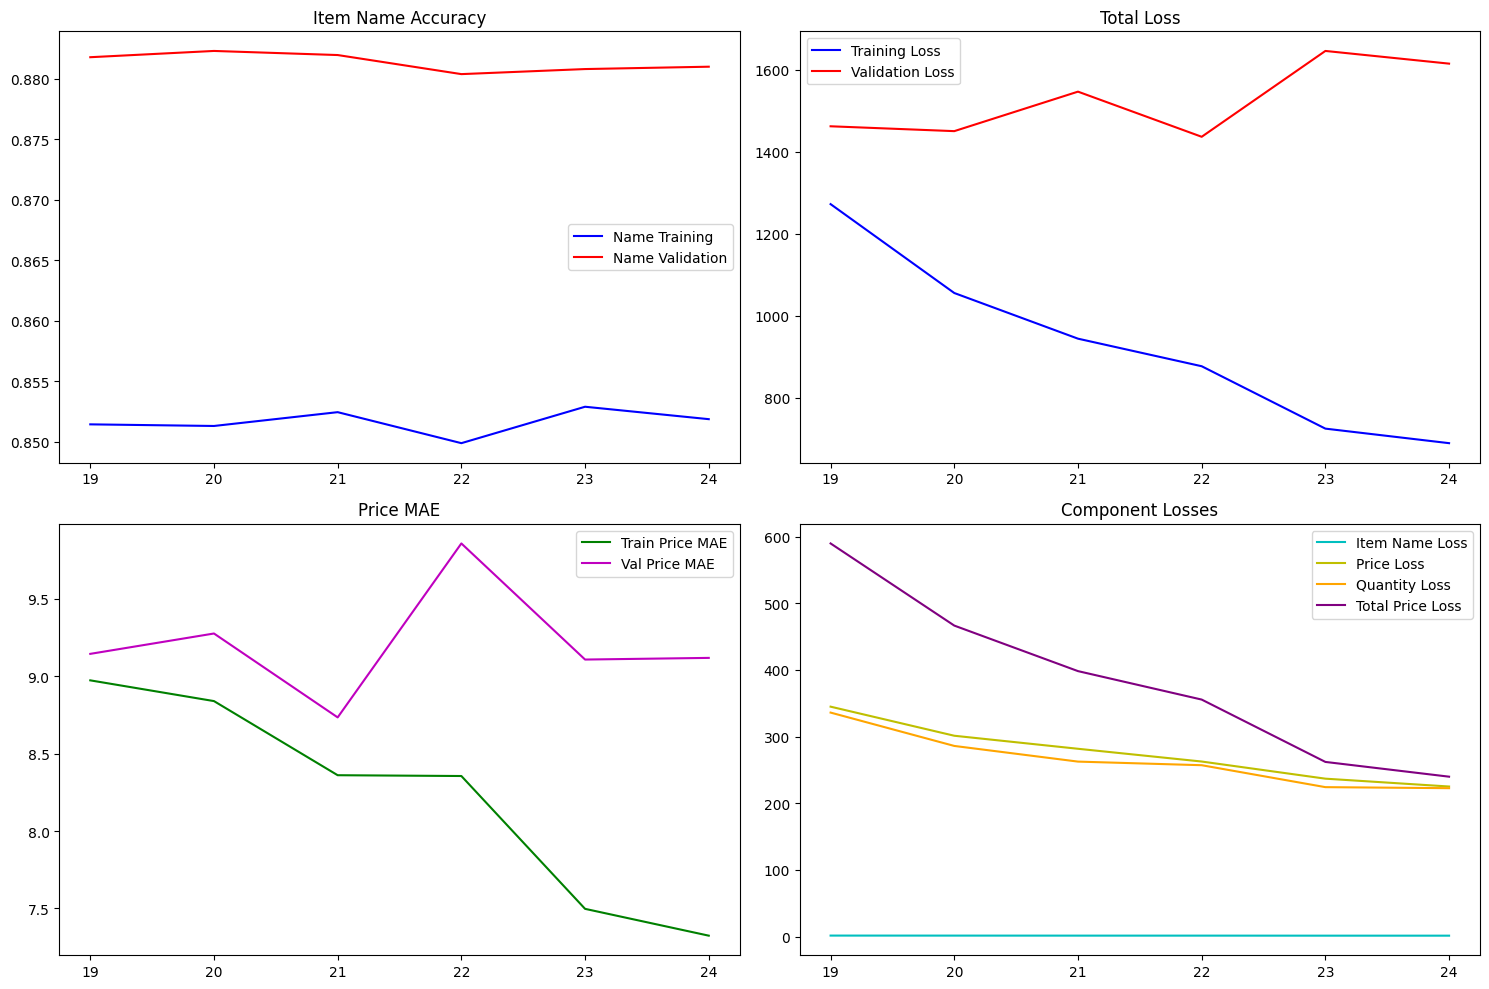

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load training log
log_data = pd.read_csv("training_log.csv")

plt.figure(figsize=(15, 10))

# Plot Item Name Accuracy
plt.subplot(2, 2, 1)
plt.plot(log_data['epoch'], log_data['item_name_accuracy'], 'b-', label='Name Training')
plt.plot(log_data['epoch'], log_data['val_item_name_accuracy'], 'r-', label='Name Validation')
plt.title('Item Name Accuracy')
plt.legend()

# Plot Total Loss (di subplot berbeda)
plt.subplot(2, 2, 2)
plt.plot(log_data['epoch'], log_data['loss'], 'b-', label='Training Loss')
plt.plot(log_data['epoch'], log_data['val_loss'], 'r-', label='Validation Loss')
plt.title('Total Loss')
plt.legend()

# Plot Regression Performance (Price MAE)
plt.subplot(2, 2, 3)
plt.plot(log_data['epoch'], log_data['price_mae'], 'g-', label='Train Price MAE')
plt.plot(log_data['epoch'], log_data['val_price_mae'], 'm-', label='Val Price MAE')
plt.title('Price MAE')
plt.legend()

# Plot Component Losses
plt.subplot(2, 2, 4)
plt.plot(log_data['epoch'], log_data['item_name_loss'], 'c-', label='Item Name Loss')
plt.plot(log_data['epoch'], log_data['price_loss'], 'y-', label='Price Loss')
plt.plot(log_data['epoch'], log_data['quantity_loss'], 'orange', label='Quantity Loss')
plt.plot(log_data['epoch'], log_data['total_price_loss'], 'purple', label='Total Price Loss')
plt.title('Component Losses')
plt.legend()

plt.tight_layout()
plt.show()


In [32]:
from google.colab import auth
auth.authenticate_user()

from googleapiclient.discovery import build
from googleapiclient.http import MediaFileUpload
import os

In [33]:
# Save Model
model.save("faster_rcnn_resnet50v2.h5")
model.save("faster_rcnn_resnet50v2.keras")
print("Model saved successfully!")

Model saved successfully!


In [37]:
drive_service = build('drive', 'v3')

folder_id = "1a0i_DpxSo1RnkT7ZjUr_AdawVvW2vBSX"  # Dapatkan dari URL Google Drive folder kamu

file_metadata = {
    "name": "faster_rcnn_resnet50v2.keras",
    "parents": [folder_id]
}
media = MediaFileUpload("faster_rcnn_resnet50v2.keras", mimetype="application/octet-stream")

file = drive_service.files().create(body=file_metadata, media_body=media, fields="id").execute()
print(f"File uploaded with ID: {file.get('id')}")

file_metadata_h5 = {
    "name": "faster_rcnn_resnet50v2.h5",
    "parents": [folder_id]
}
media_h5 = MediaFileUpload("faster_rcnn_resnet50v2.h5", mimetype="application/octet-stream")

file_h5 = drive_service.files().create(body=file_metadata_h5, media_body=media_h5, fields="id").execute()
print(f"File uploaded with ID: {file_h5.get('id')}")


File uploaded with ID: 1WeZz5CKmAk7nvj30ELGObwcohTy3nJTA
File uploaded with ID: 1ybICnYhNfG3zCo1g9ToXRXZAJ05YIPia


**Text Extraction**

> using easyocr

> support bahasa indonesia and english





In [ ]:
reader = easyocr.Reader(['en', 'id'])

def is_receipt(text):
    text_lower = text.lower()

    if 'total' or 'amount' or 'jumlah' and 'price' or 'harga' in text_lower:
        print("This is a valid receipt.")
    else:
        print("This is not a valid receipt.")


def process_image(image):
    # Convert PIL Image to numpy array
    image_np = np.array(image)
    if image_np.dtype != np.uint8:
        image_np = (image_np * 255).astype(np.uint8)  # Normalisasi jika float64

    # Extract text using EasyOCR
    results = reader.readtext(image_np)

    # Combine all detected text into a single string
    extracted_text = ' '.join([result[1] for result in results])

    # Check if the extracted text is a receipt
    is_receipt(extracted_text)

    print("Extracted Text:")
    print(extracted_text)

Fine Tuning

In [ ]:
# import os
# import json

# def convert_dataset_local(dataset, output_file):
#     annotations = []

#     # Pastikan folder untuk menyimpan gambar ada
#     os.makedirs("dataset_images", exist_ok=True)

#     for i, data in enumerate(dataset):
#         image = data["image"]  # Objek gambar dari PIL
#         ground_truth = json.loads(data["ground_truth"])  # Parsing JSON string

#         # Simpan gambar ke folder agar bisa digunakan oleh EasyOCR
#         image_path = f"dataset_images/image_{i}.jpg"
#         image.save(image_path)

#         # Ambil teks dan bounding box dari ground truth
#         text = ground_truth["gt_parse"]  # Semua teks dan informasi struk
#         words = []
#         for line in ground_truth["valid_line"]:  # Ambil setiap baris
#             for word in line["words"]:  # Ambil setiap kata dalam baris
#                 words.append({
#                     "text": word["text"],
#                     "quad": word["quad"],
#                     "row_id": word["row_id"],
#                     "category": line["category"],
#                     "group_id": line["group_id"]
#                 })

#         # Simpan dalam format yang sesuai untuk EasyOCR
#         annotations.append({
#             "image": image_path,
#             "text": text,
#             "words": words
#         })

#     # Simpan hasil dalam file JSON
#     with open(output_file, "w", encoding="utf-8") as f:
#         json.dump(annotations, f, indent=4, ensure_ascii=False)


# def convert_dataset_inter(dataset, output_file):
#     """
#     Mengonversi dataset faktur/invoice ke format JSON untuk EasyOCR.
#     """
#     annotations = []

#     for i, data in enumerate(dataset):
#         image = data["image"]  # PIL Image
#         ground_truth = json.loads(data["ground_truth"])["gt_parse"]  # Parse JSON

#         # Simpan gambar
#         image_path = f"dataset_images/invoice_{i}.jpg"
#         os.makedirs("dataset_images", exist_ok=True)
#         image.save(image_path)

#         words = []
#         items = ground_truth.get("items", [])  # Pastikan mengambil 'items' dengan default []
#         if items:
#             for item in items:
#                 words.append({
#                     "text": item.get("item_desc", "UNKNOWN_ITEM"),
#                     "quad": None,
#                     "row_id": None,
#                     "group_id": None
#                 })

#         annotations.append({
#             "image": image_path,
#             "text": ground_truth,  # Simpan seluruh teks yang diparsing
#             "bbox": words
#         })

#         # Pastikan folder Google Drive tujuan benar
#         drive_folder = "G:/My Drive/dataset"
#         output_file = os.path.join(drive_folder, "dataset_annotations.json")

#         # Simpan sebagai JSON
#         with open(output_file, "w", encoding="utf-8") as f:
#             json.dump(annotations, f, indent=4, ensure_ascii=False)

#         print(f"Dataset invoice berhasil disimpan ke {output_file}")


In [ ]:
# # Konversi dataset 1 dan dataset 2
# convert_dataset_local(data_tuning_local, "data_tuning_local.json")
# convert_dataset_inter(data_tuning_inter, "data_tuning_inter.json")

In [ ]:
# python train.py --batch_size 16 --num_epochs 10 --lr 0.001 --train_data data_tuning_local.json data_tuning_inter.json


POST-PROCESSING

Pre-Processing Hasil Text Extraction

Training BERT/NER